# Decorator


## Definition of Decorator
 装饰器本质上是一个Python函数(其实就是闭包)，它可以让其他函数在不需要做任何代码变动的前提下增加额外功能，装饰器的返回值也是一个函数对象。装饰器用于有以下场景，比如:插入日志、性能测试、事务处理、缓存、权限校验等场景。

## How to write a decorator function  
1. Normal method

In [4]:
# To add a function to count working times.
import time
import threading
def count_time(func):
    def inner():
        t_start = time.time()
        func()
        t_end = time.time()
        print("Time spend: {}".format(t_end-t_start))
    return inner()
# 因为我return了inner这个inner会继续存在然后
def sleep_5s():
    time.sleep(5)
    print('Sleeped 5 seconds')

def sleep_6s():
    time.sleep(6)
    print('Sleeped 6 seconds')

sleep_5s = count_time(sleep_5s)
sleep_6s = count_time(sleep_6s)
 
t1 = threading.Thread(target=sleep_5s)
t2 = threading.Thread(target=sleep_6s)
t1.start()
t2.start()

Sleeped 5 seconds
Time spend: 5.0124547481536865
Sleeped 6 seconds
Time spend: 6.0140581130981445


2. Syntax Sugar

In [5]:
import time
import threading
def count_time(func):
    def inner():
        t_start = time.time()
        func()
        t_end = time.time()
        print("Time spend: {}".format(t_end-t_start))
    return inner()

@count_time
# @count_time等价于sleep_5s = count_time(sleep_5s)
def sleep_5s():
    time.sleep(5)
    print("%d秒结束了" % (5,))
@count_time
def sleep_6s():
    time.sleep(6)
    print("%d秒结束了" % (6,))

t1 = threading.Thread(target=sleep_5s)
t2 = threading.Thread(target=sleep_6s)
t1.start()
t2.start()

5秒结束了
Time spend: 5.015544891357422
6秒结束了
Time spend: 6.01477837562561


## Multi-decorate function


In [6]:
# 为函数添加一个统计运行时长的功能以及日志记录功能
import time
import threading
 
def how_much_time(func):
    print("how_much_time函数开始了")
    def inner():
        t_start = time.time()
        func()
        t_end = time.time()
        print("一共花费了{0}秒时间".format(t_end - t_start, ))
    return inner
 
def mylog(func):
    print("mylog函数开始了")
    def inner_1():
        print("start")
        func()
        print("end")
    return inner_1
 
@mylog
@how_much_time
# 等价于mylog(how_much_time(sleep_5s))
def sleep_5s():
    time.sleep(5)
    print("%d秒结束了" % (5,))
 
if __name__ == '__main__':
    sleep_5s()
#how_much_time函数开始了
#mylog函数开始了
#start
#5秒结束了
#一共花费了5.012601613998413秒时间
#end

how_much_time函数开始了
mylog函数开始了
start
5秒结束了
一共花费了5.006269216537476秒时间
end


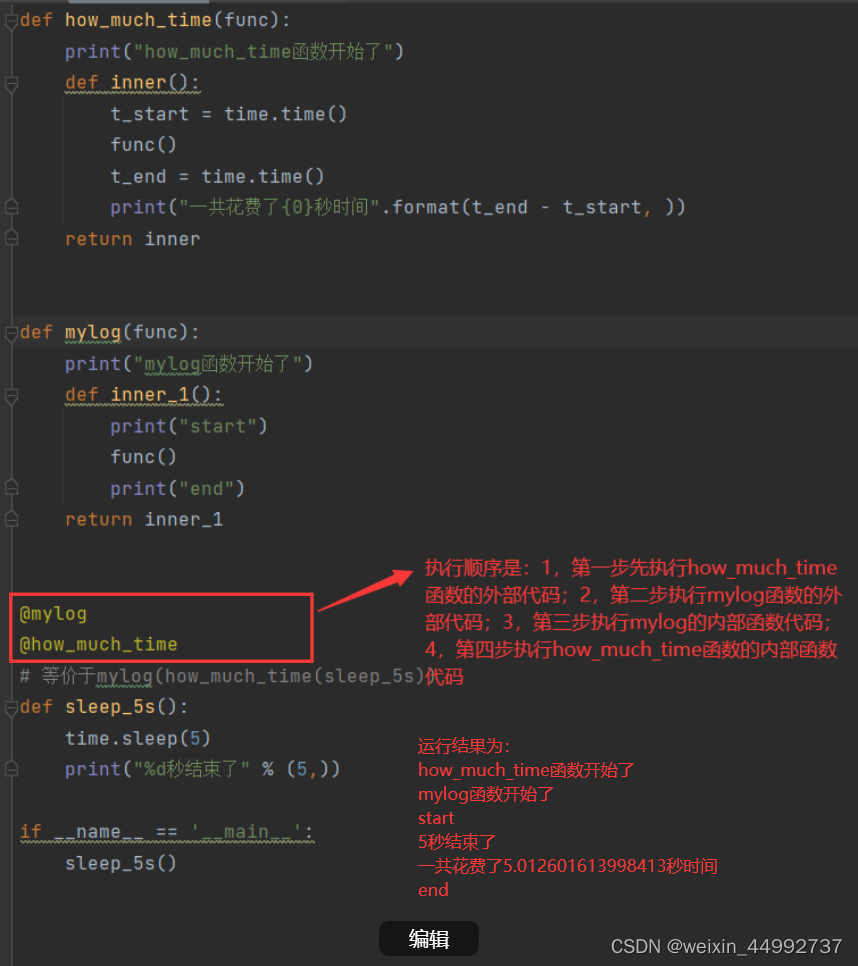

## A decorator with a variable
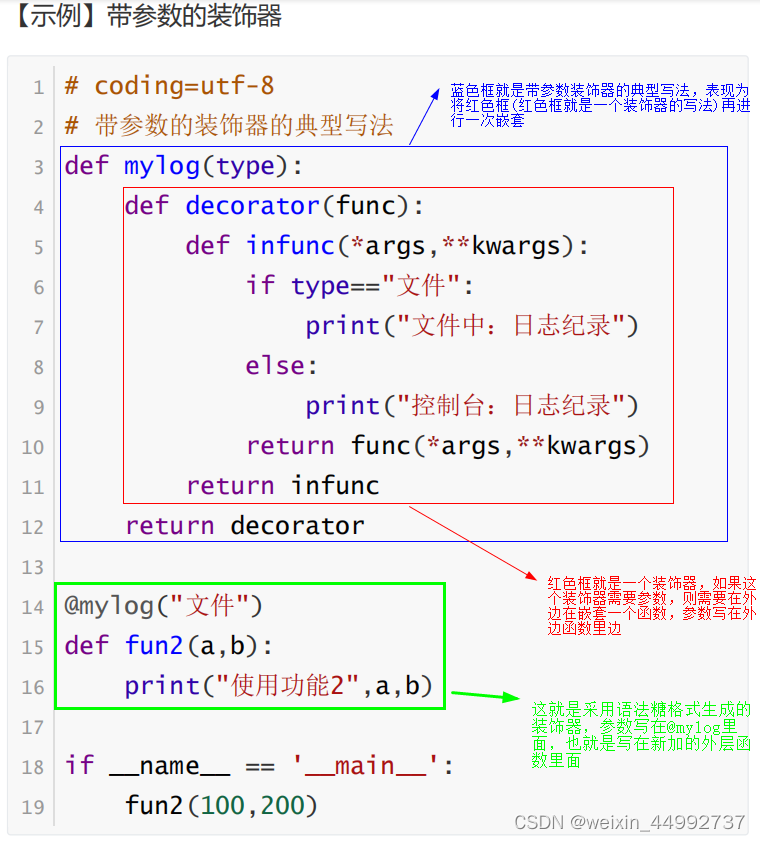

## Class decorator

类装饰器

    类装饰器这个写法，主要思路就是返回一个增加了新功能的函数对象，只不过这个函数对象是一个类的实例对象。由于装饰器是可调用对象，所以必须在类里面实现__call__方法，这样由类生成的各种实例加上()就可以运行了。

1，不带参数的类装饰器

    import time

    class Decorator:
        def __init__(self, func):
            self.func = func
     
        def defer_time(self):
            time.sleep(5)
            print("延时结束了")
     
        def __call__(self, *args, **kwargs):
            self.defer_time()
            self.func()
     
     
    @Decorator
    def f1():
        print("延时之后我才开始执行")
     
     
    f1()

2，带参数的类装饰器

    import time
     
    class Decorator:
        def __init__(self, func):
            self.func = func
     
        def defer_time(self,time_sec):
            time.sleep(time_sec)
            print(f"{time_sec}s延时结束了")
     
        def __call__(self, time):
            self.defer_time(time)
            self.func()
     
    @Decorator
    def f1():
        print("延时之后我才开始执行")
     
    f1(5)

### Note: Concurrency and Parallelism



在计算机科学中，有两个常见的概念是并发和并行，它们描述了程序或系统中多个任务执行的方式。

1. **并发（Concurrency）**：
   - 并发是指多个任务在同一时间段内交替执行，但不一定是同时执行的。它通常在单处理器系统上模拟多个任务同时执行的效果，通过在任务之间快速切换来实现。
   - 在并发模型中，任务可能在某个时间点上交替执行，但实际上并没有同时进行。这样的设计通常用于提高系统的响应性，使得在等待某些事件发生时可以执行其他任务。

2. **并行（Parallelism）**：
   - 并行是指多个任务在同一时刻同时执行，通常是在多个处理器或多核处理器系统上实现的。
   - 在并行模型中，任务真正地同时执行，每个任务都在不同的处理单元上运行。这样的设计通常用于加速程序的执行，特别是对于需要大量计算的任务。

`threading.Thread`主要用于实现并发，而对于真正的并行执行，有时候需要使用`multiprocessing`模块。在Python中，由于全局解释器锁（Global Interpreter Lock，GIL）的存在，`threading`模块在某些情况下可能不适合实现真正的并行，因为在同一时刻只有一个线程能够执行Python字节码。如果你想要利用多核处理器进行并行执行，可以考虑使用`multiprocessing`模块创建进程。